# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

Reading the data which is included in the 'data_banknote_authentication.csv' file

In [100]:
df = pd.read_csv("data_banknote_authentication.csv")

Dividing the data into features and labels (X and y)

In [103]:
X = df.drop('Class',axis=1)
y = df['Class']

Splitting the data into train and test parts

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use the RandomForest model with a GridSearch to optimize 'n_estimators', 'max_features' and 'criterion' parameters

In [109]:
scaler = StandardScaler()
model = RandomForestClassifier()
operations = [('scaler',scaler),('random_forest',model)]
pipe = Pipeline(operations)

In [123]:
param_grid = {
    'random_forest__n_estimators': np.arange(1,10),  
    'random_forest__max_features': ['sqrt', 'log2', None],  
    'random_forest__criterion': ['gini', 'entropy']  
}

In [125]:
grid_search = GridSearchCV(pipe,param_grid,scoring='accuracy')

In [127]:
grid_search.fit(X_train,y_train)
model = grid_search.best_estimator_

In [129]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 RandomForestClassifier(criterion='entropy',
                                        max_features='log2', n_estimators=5))])

In [131]:
y_pred = model.predict(X_test)

Evaluate the model by displaying a confusion matrix and a classification report 

In [134]:
cm = confusion_matrix(y_test,y_pred)

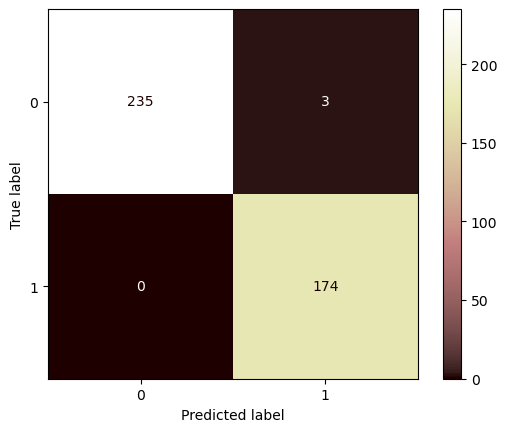

In [136]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.pink)  
plt.show()

In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       238
           1       0.98      1.00      0.99       174

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

